<a href="https://colab.research.google.com/github/rahuls321/Time-Series-Forecasting-With-Python/blob/master/Normalize_%26_Standardize_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


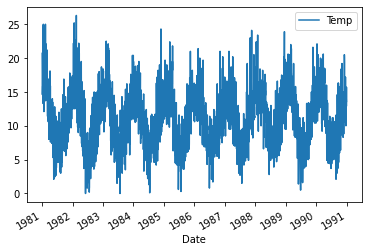

In [2]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('gdrive/My Drive/Colab Notebooks/Forecasting_Datasets/daily-min-temperatures.csv', header=0, parse_dates =["Date"], index_col ="Date")
print(series.head())
series.plot()
pyplot.show()

##Normalization of time series data

Normalization is a rescaling of the data from the original range so that all values are within the range of 0 and 1.

y = (x - min) / (max - min)

In [5]:
from sklearn.preprocessing import MinMaxScaler
# prepare data for normalization
values = series.values
values = values.reshape((len(values), 1))
# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
# normalize the dataset and print the first 5 rows
normalized = scaler.transform(values)
print("Normalized Data")
for i in range(5):
	print(normalized[i])
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
print("Original Data after inverse transformation")
for i in range(5):
	print(inversed[i])

Min: 0.000000, Max: 26.300000
Normalized Data
[0.78707224]
[0.68060837]
[0.7148289]
[0.55513308]
[0.60076046]
Original Data after inverse transformation
[20.7]
[17.9]
[18.8]
[14.6]
[15.8]


##Standardize the data

It is more robust to new values being outside the range of expected values.
Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1. 

It assumes that your observations fit a Gaussian distribution (bell curve) with a well behaved mean and standard deviation.

This includes algorithms like Support Vector Machines, Linear and Logistic Regression, and other algorithms that assume or have improved performance with Gaussian data.

y = (x - mean) / standard_deviation

mean = sum(x) / count(x)

standard_deviation = sqrt( sum( (x - mean)^2 ) / count(x))

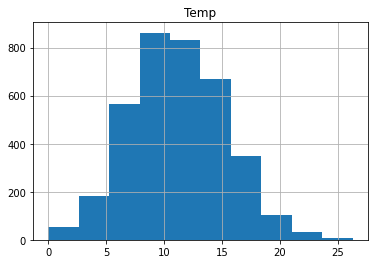

In [6]:
series.hist()
pyplot.show()

In [10]:
from sklearn.preprocessing import StandardScaler
from math import sqrt

# prepare data for standardization
values = series.values
values = values.reshape((len(values), 1))
# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))
# standardization the dataset and print the first 5 rows
normalized = scaler.transform(values)
print("Standardize data")
for i in range(5):
	print(normalized[i])
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
print("Original Data after inverse transformation")
for i in range(5):
	print(inversed[i])

Mean: 11.177753, StandardDeviation: 4.071279
Standardize data
[2.33888328]
[1.65113873]
[1.87219948]
[0.84058266]
[1.13533032]
Original Data after inverse transformation
[20.7]
[17.9]
[18.8]
[14.6]
[15.8]
